In [1]:
import tensorflow as tf
import keras 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras import regularizers
import pandas as pd
import numpy as np
import os
import datetime
from keras.callbacks import EarlyStopping, TensorBoard

In [2]:
filepath = r"C:\Users\User\Downloads\Heart Disease Prediction Project\heart.csv"

heart_disease = pd.read_csv(filepath)
heart_disease = heart_disease.drop(['age','sex'], axis = 1)
heart_disease.head(10)

,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,125,212,0,1,168,0,1.0,2,2,3,0
1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,0,145,174,0,1,125,1,2.6,0,0,3,0
3,0,148,203,0,1,161,0,0.0,2,1,3,0
4,0,138,294,1,1,106,0,1.9,1,3,2,0
5,0,100,248,0,0,122,0,1.0,1,0,2,1
6,0,114,318,0,2,140,0,4.4,0,3,1,0
7,0,160,289,0,0,145,1,0.8,1,1,3,0
8,0,120,249,0,0,144,0,0.8,2,0,3,0
9,0,122,286,0,0,116,1,3.2,1,2,2,0


In [3]:
heart_disease_features = heart_disease.drop('target',axis=1)
heart_disease_label = heart_disease['target']

In [4]:
print(f"The shape of features: {heart_disease_features.shape}")
print(f"The shape of label: {heart_disease_label.shape}")

The shape of features: (1025, 11)
The shape of label: (1025,)


In [5]:
numpy_features = heart_disease_features.to_numpy()
numpy_label = heart_disease_label.to_numpy()

In [6]:
numpy_label = numpy_label.reshape(1025,1)

In [7]:
print(f"The shape of features: {numpy_features.shape}")
print(f"The shape of label: {numpy_label.shape}")

The shape of features: (1025, 11)
The shape of label: (1025, 1)


In [8]:
features_train, features_test, label_train, label_test = train_test_split(numpy_features,
                                                                         numpy_label,
                                                                         test_size = 0.2,
                                                                         random_state = 12345)

In [9]:
standardizer = StandardScaler()
features_train = standardizer.fit_transform(features_train)
features_test = standardizer.transform(features_test)

In [10]:
nIn = features_train.shape[-1]

In [11]:
# Use functional API
inputs = keras.Input(shape=(nIn,))
h1 = keras.layers.Dense(128, activation='relu')(inputs)
dropout1 = keras.layers.Dropout(0.25)(h1)
h2 = keras.layers.Dense(64, activation='relu')(dropout1)
dropout2 = keras.layers.Dropout(0.25)(h2)
h3 = keras.layers.Dense(32, activation='relu')(dropout2)
dropout3 = keras.layers.Dropout(0.5)(h3)
out = keras.layers.Dense(1, activation='sigmoid')(dropout3) 

fnn_model = keras.Model(inputs=inputs, outputs=out)
fnn_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 11)]              0         
                                                                 
 dense (Dense)               (None, 128)               1536      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0     

In [12]:
adam = keras.optimizers.Adam(learning_rate=0.001)
bce = keras.losses.BinaryCrossentropy(from_logits=False)
accuracy = keras.metrics.BinaryAccuracy()

In [13]:
fnn_model.compile(optimizer=adam,loss=bce,metrics=[accuracy])
#fnn_model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9, nesterov=True),loss=bce,metrics=[accuracy])

In [14]:
base_log_path = r"C:\Users\User\Downloads\heart_log"
log_path = os.path.join(base_log_path, datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
es = EarlyStopping(monitor='val_loss',patience=5,verbose=2)
tb = TensorBoard(log_dir=log_path)

In [15]:
history = fnn_model.fit(features_train, label_train, 
                        validation_data=(features_test, label_test), 
                        batch_size=32, epochs=20, callbacks=[es,tb])

Epoch 1/20
26/26 [==============================] - 8s 42ms/step - loss: 0.6395 - binary_accuracy: 0.6354 - val_loss: 0.4954 - val_binary_accuracy: 0.8341
Epoch 2/20
26/26 [==============================] - 1s 22ms/step - loss: 0.4890 - binary_accuracy: 0.8000 - val_loss: 0.3971 - val_binary_accuracy: 0.8195
Epoch 3/20
26/26 [==============================] - 1s 26ms/step - loss: 0.4426 - binary_accuracy: 0.8085 - val_loss: 0.3673 - val_binary_accuracy: 0.8390
Epoch 4/20
26/26 [==============================] - 1s 26ms/step - loss: 0.4089 - binary_accuracy: 0.8268 - val_loss: 0.3522 - val_binary_accuracy: 0.8537
Epoch 5/20
26/26 [==============================] - 1s 22ms/step - loss: 0.3870 - binary_accuracy: 0.8378 - val_loss: 0.3374 - val_binary_accuracy: 0.8634
Epoch 6/20
26/26 [==============================] - 1s 23ms/step - loss: 0.3788 - binary_accuracy: 0.8476 - val_loss: 0.3218 - val_binary_accuracy: 0.8829
Epoch 7/20
26/26 [==============================] - 1s 24ms/step - los

In [16]:
training_loss = history.history['loss']
training_acc = history.history['binary_accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_binary_accuracy']

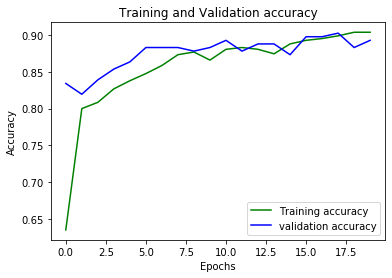

In [17]:
epochs = history.epoch
fig1, axs1 = plt.subplots()
axs1.plot(epochs, training_acc, 'g', label='Training accuracy')
axs1.plot(epochs, val_acc, 'b', label='validation accuracy')
axs1.set_title('Training and Validation accuracy')
axs1.set_xlabel('Epochs')
axs1.set_ylabel('Accuracy')
axs1.legend()

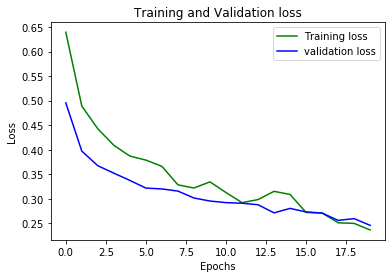

In [18]:
fig2, axs2 = plt.subplots()
axs2.plot(epochs, training_loss, 'g', label='Training loss')
axs2.plot(epochs, val_loss, 'b', label='validation loss')
axs2.set_title('Training and Validation loss')
axs2.set_xlabel('Epochs')
axs2.set_ylabel('Loss')
axs2.legend()